In [ ]:
!pip install neuralprophet

In [ ]:
import yfinance as yf
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [ ]:
pip install pandas==1.5.3

In [ ]:
symbol = '^SPX'
start_date = '2010-01-01'
end_date = '2024-01-01'

stock_data = yf.download(symbol, start = start_date, end = end_date)

print(stock_data.head())

stock_data.to_csv('^SPX.csv')

# Load your CSV data into a DataFrame
df = pd.read_csv('^SPX.csv')

# Determine the split index for 80% training and 20% testing
split_index = int(0.8 * len(df))

# Split the shuffled DataFrame into training and testing DataFrames
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Save training and testing DataFrames to separate CSV files
train_df.to_csv('^SPX_train.csv', index=False)
test_df.to_csv('^SPX_test.csv', index=False)

df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  1116.560059  1133.869995  1116.560059  1132.989990  1132.989990   
2010-01-05  1132.660034  1136.630005  1129.660034  1136.520020  1136.520020   
2010-01-06  1135.709961  1139.189941  1133.949951  1137.140015  1137.140015   
2010-01-07  1136.270020  1142.459961  1131.319946  1141.689941  1141.689941   
2010-01-08  1140.520020  1145.390015  1136.219971  1144.979980  1144.979980   

                Volume  
Date                    
2010-01-04  3991400000  
2010-01-05  2491020000  
2010-01-06  4972660000  
2010-01-07  5270680000  
2010-01-08  4389590000  


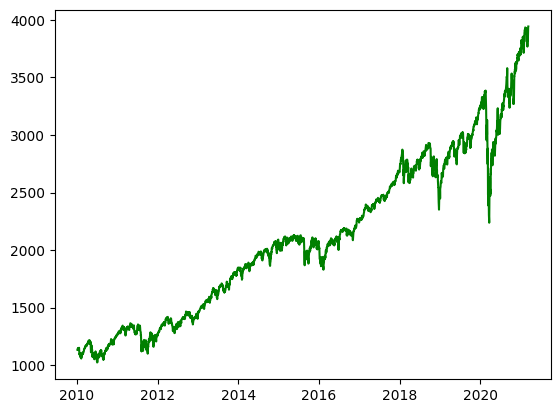

In [ ]:
index = pd.read_csv('^SPX_train.csv')
index['Date'] = pd.to_datetime(index['Date'])
index = index[['Date', 'Close']]
index.columns = ['ds', 'y']

plt.plot(index['ds'], index['y'], label = 'actual', c = 'g')
plt.show()

In [ ]:
model = NeuralProphet()
model.fit(index)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.344% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.344% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.co

Finding best initial lr:   0%|          | 0/236 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,4246.306641,4778.254883,1.267358,0.0,0
1,2923.495850,3507.020752,0.826653,0.0,1
2,1727.334595,2170.765869,0.438566,0.0,2
3,790.283142,992.030457,0.143445,0.0,3
4,499.782776,613.273438,0.064706,0.0,4
...,...,...,...,...,...
75,79.681183,117.671852,0.003994,0.0,75
76,80.058586,117.263367,0.003950,0.0,76
77,77.642197,116.580406,0.003915,0.0,77
78,84.290405,122.586021,0.004725,0.0,78


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.344% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.344% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.868% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.868% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.868% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.868% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 45it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.344% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.344% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.344% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.344% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 45it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


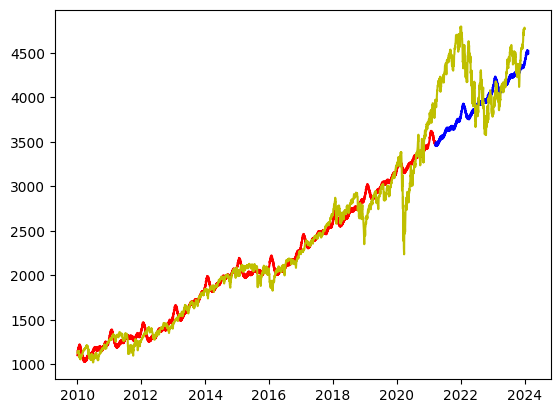

In [ ]:
future = model.make_future_dataframe(index, periods = 760)

forecast = model.predict(future)
forecast
actual_prediction = model.predict(index)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'Actual_Predictions', c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'Predictions', c = 'b')
plt.plot(df['ds'], df['y'], label = 'Actual', c = 'y')
plt.show()

In [ ]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
